# Problem 3 - State Estimation

## Agenda
- Problem Description
- Problem Implementation
- Alternative Problems
- Wrap-Up

## Problem Description
- <b>Consider a grid for which we have sufficient metering data <i>z<sub>meter</sub></i> and discover the state vector <i>x</i> that fully characterizes the condition in which the grid is being operated, given the grid static information of its structure and corresponding component models.<b>

    _______________________________________________________________________________________________________________________

Considered "Kite" 5 Bus Network
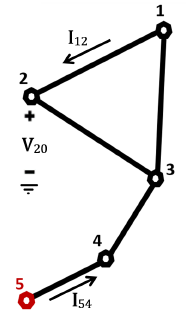

- <b>Implementation.<b>

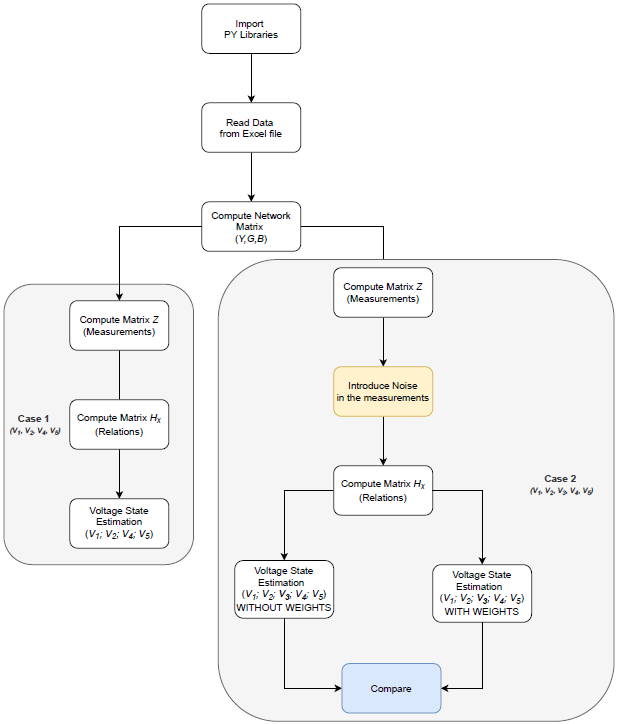

<b>Import Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<b>Parameters

In [2]:
networkFactor = 100    # To change the characteristics of the network (Y)
cosPhi=0.95            # Value of teta
m=100                  # Number of Iterations   
sig=0.5                # Noise factor 

<b>Import data (From Excel file)

In [3]:
Info = np.array(pd.read_excel (r'C:\Data\DASG_Prob2_new.xlsx', sheet_name='Info', header=None))
# Information about the slack bus
SlackBus=Info[0,1]
print ("Slack Bus: ", SlackBus,"\n")

# Network Information
Net_Info = np.array(pd.read_excel (r'C:\Data\DASG_Prob2_new.xlsx', sheet_name='Y_Data'))
print ("Lines information (Admitances)\n", Net_Info, "\n")

#Power Information (train)
Power_Info = np.array(pd.read_excel (r'C:\Data\DASG_Prob2_new.xlsx', sheet_name='Load(t,Bus)'))
Power_Info = np.delete(Power_Info,[0],1)
print ("Power consumption information (time, Bus) - (Train)\n", Power_Info, "\n")

time=Power_Info.shape[0]
P=np.dot(-Power_Info,np.exp(complex(0,1)*np.arccos(cosPhi)))
I=np.conj(P[2,:])

Slack Bus:  5 

Lines information (Admitances)
 [[1 2 '0,01-0,1i']
 [1 3 '0,02-0,2i']
 [2 3 '0,03-0,2i']
 [3 4 '0,03-0,2i']
 [4 5 '0,02-0,2i']] 

Power consumption information (time, Bus) - (Train)
 [[0.332 0.064 0.084 0.12 ]
 [0.236 0.164 0.276 0.064]
 [0.224 0.708 1.572 0.072]
 [0.36  3.44  1.188 0.18 ]
 [1.332 2.176 0.484 1.464]
 [1.516 3.02  0.316 0.624]
 [0.92  0.916 0.404 2.772]
 [0.752 0.64  0.396 1.464]
 [1.828 0.684 0.576 0.576]
 [3.568 0.564 0.828 0.428]
 [0.78  0.356 0.728 0.348]
 [0.856 0.22  0.308 0.12 ]
 [0.684 0.528 0.256 0.44 ]] 



<b>Admittance Matrix(Y); Conductance Matrix(G); Susceptance Matrix(B)

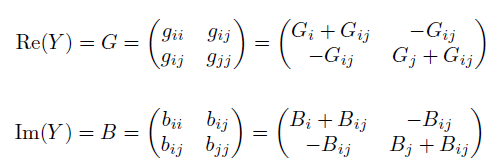

In [4]:
# Determine the number of Bus
nBus=max(np.max(Net_Info[:,0]),np.max(Net_Info[:,1]))

# Create the variable number of lines and the admitance matrix (Y)
nLines=Net_Info.shape[0]

Y=np.zeros((nBus,nBus), dtype=complex)

#Complete the Y matrix nad update the number of lines
for i in range (Net_Info.shape[0]):
    y_aux=Net_Info[i,2].replace(",",".")
    y_aux=y_aux.replace("i","j")
    Y[Net_Info[i,0]-1,Net_Info[i,0]-1]=Y[Net_Info[i,0]-1,Net_Info[i,0]-1]+complex(y_aux)*networkFactor
    Y[Net_Info[i,1]-1,Net_Info[i,1]-1]=Y[Net_Info[i,1]-1,Net_Info[i,1]-1]+complex(y_aux)*networkFactor
    Y[Net_Info[i,0]-1,Net_Info[i,1]-1]=Y[Net_Info[i,0]-1,Net_Info[i,1]-1]-complex(y_aux)*networkFactor
    Y[Net_Info[i,1]-1,Net_Info[i,0]-1]=Y[Net_Info[i,1]-1,Net_Info[i,0]-1]-complex(y_aux)*networkFactor

            
# Remove the slack bus from the admitance matrix            
Yl=np.delete(Y, np.s_[SlackBus-1], axis=0)
Yl=np.delete(Yl, np.s_[SlackBus-1], axis=1)

# Conductance Matrix
G=Yl.real

# Susceptance Matrix
B=Yl.imag 

print("The admitance matrix Y is:\n", Y, "\n")
print("The conductance matrix G is\n", G, "\n")
print("The susceptance matrix B is\n",B, "\n")

The admitance matrix Y is:
 [[ 3.-30.j -1.+10.j -2.+20.j  0. +0.j  0. +0.j]
 [-1.+10.j  4.-30.j -3.+20.j  0. +0.j  0. +0.j]
 [-2.+20.j -3.+20.j  8.-60.j -3.+20.j  0. +0.j]
 [ 0. +0.j  0. +0.j -3.+20.j  5.-40.j -2.+20.j]
 [ 0. +0.j  0. +0.j  0. +0.j -2.+20.j  2.-20.j]] 

The conductance matrix G is
 [[ 3. -1. -2.  0.]
 [-1.  4. -3.  0.]
 [-2. -3.  8. -3.]
 [ 0.  0. -3.  5.]] 

The susceptance matrix B is
 [[-30.  10.  20.   0.]
 [ 10. -30.  20.   0.]
 [ 20.  20. -60.  20.]
 [  0.   0.  20. -40.]] 



<b>1º State Estimation considering complete information about currents <i>I<sub>12</sub></i> and <i>I<sub>54</sub></i> (amplitude and angle) and not estimating <i>V<sub>3</sub></i>; Page 39

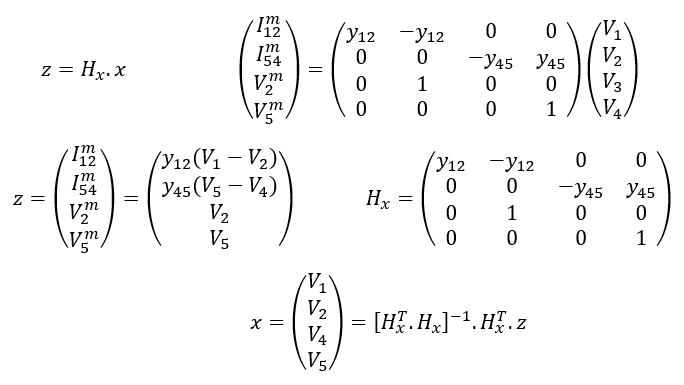

In [5]:
# Matrix Creation
b0s=np.zeros((4), dtype=np.complex)
A0s=np.zeros((4,4), dtype=np.complex)
v0s=np.zeros((5), dtype=np.complex)

# Voltage Computing (Reference)
v0s[0:4]=1+np.dot(np.linalg.inv(Yl),I)
v0s[4]=1

# Measurement values z 


# Matrix Hx 


#State Variables (x) - These variables are the estimated voltages (V1; V2; V4; V5)



C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_21792/1620126294.py:2: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  b0s=np.zeros((4), dtype=np.complex)
C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_21792/1620126294.py:3: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  A0s=np.zeros((4,4), dtype=np.complex)
C:\Users\UTILIZ~

<b>2º State Estimation considering RMS information of currents <i>I<sub>12</sub></i> and <i>I<sub>54</sub></i> and estimating <i>V<sub>3</sub></i>. Page 41
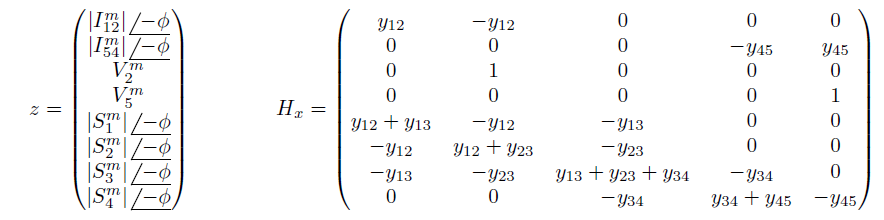

In [6]:
# Matrix Creation
b0=np.zeros((8), dtype=np.complex)
b1=np.zeros((8), dtype=np.complex)
b2=np.zeros((8), dtype=np.complex)
A=np.zeros((8,5), dtype=np.complex)
v=np.zeros((5), dtype=np.complex)

# Voltage Computing (Reference)
v[0:4]=1+np.dot(np.linalg.inv(Yl),I)
v[4]=1

# Measurement values z (In that case, we are computing the currents and voltages but we can also measure them).
b0[0]=np.dot(np.absolute(np.dot(-Y[0,1],(v[0]-v[1]))),np.exp(complex(0,-1)*np.arccos(cosPhi)))
b0[1]=np.dot(np.absolute(np.dot(-Y[3,4],(1-v[3]))),np.exp(complex(0,-1)*np.arccos(cosPhi)))
b0[2]=v[1]
b0[3]=1
b0[4:8]=I #In that case, we are also including the vectors of aparente power

# Matrix Hx (Page 41)



C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_21792/1062866779.py:2: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  b0=np.zeros((8), dtype=np.complex)
C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_21792/1062866779.py:3: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  b1=np.zeros((8), dtype=np.complex)
C:\Users\UTILIZ~1\Ap

<b>2º a) - First, the weight of pseudo-measurements (Matrix W) <u>are not considered</u>;

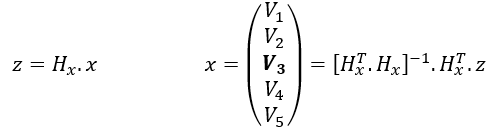

In [51]:
#Noise to be added to peseudo-measurements
e= np.random.normal(0.0, 1.0, size=(4,m))*sig

#Estimation not considering the noise 


#Matrix creation 
sx=np.zeros(5)
rms=np.zeros((5,m))
ei12a=np.zeros(m)
ei54a=np.zeros(m)

for i in range(m):
    #Introduce error in the measurements (Matrix z) 
    b1[4:8]=I+e[:,i]   
    
    #Estimate the voltages based on measurements with the errors

    #Accumulated value of estimations

    #Errors in the voltages
    #rms[:,i]=np.sqrt(np.dot((x-x0),np.conjugate(x-x0))) 
    # x0 is the initial estimation not considering the noise 
    # x is the estimation considering the noise 

    #Relative current errors (To be used in the graphics)
    #ei12a[i]=np.divide(np.absolute(np.dot(Y[0,1],(x[0]-x[1])))-np.absolute(np.dot(Y[0,1],(v[0]-v[1]))),np.absolute(np.dot(Y[0,1],(v[0]-v[1]))))
    #ei54a[i]=np.divide(np.absolute(np.dot(Y[3,4],(1-x[3])))-np.absolute(np.dot(Y[3,4],(1-v[3]))),np.absolute(np.dot(Y[3,4],(1-v[3]))))

#Average Voltage Estimation
#x_avg=sx/m

#Average Voltage RMS Error
#ee=np.transpose(np.matrix,sum(np.transpose(rms)))/m



The estimated value of the voltages (Matrix x) WITHOUT ERRORS are:
 [0.88506628-2.43231026e-01j 0.87964302-2.53893582e-01j
 0.89236598-2.27745427e-01j 0.94804868-1.17156355e-01j
 0.99998351+1.09165534e-05j] 

The estimated value of the voltages (Matrix x) WITH ERRORS are:
 [0.88499131-0.24369174j 0.87974666-0.25307398j 0.89215249-0.22927579j
 0.94794517-0.11796694j 0.99987987-0.00080869j] 

Average Voltage Error:
 [0.03401821 0.03401821 0.03401821 0.03401821 0.03401821]


<ipython-input-51-c86fd431973d>:24: ComplexWarning: Casting complex values to real discards the imaginary part
  rms[:,i]=np.sqrt(np.dot((x-x0),np.conjugate(x-x0)))


<b>2º b) - Second, the weight of pseudo-measurements (Matrix W) <u>are considered</u>;
    
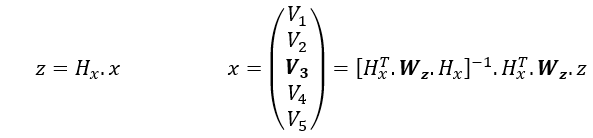

In [52]:
# The vector of errors is the same used in the first scenario 

#Matriz of the Weights (W)
#Matriz of the Weights (W)
np.fill_diagonal(W[0:4], 0.001**-2)
np.fill_diagonal(W[4:8,4:8], sig**-2)


#Estimation not considering the noise, but considering the weight 


for i in range(m):
    #Introduce error in the measurements (Matrix z) 

    #Estimate the voltages based on measurements with the errors

    #Accumulated value of estimations

    #Errors in the voltages

    #Relative current errors (To be used in the graphics)

    
#Average Voltage Estimation

#Average Voltage RMS Error



The estimated value of the voltages (Matrix x) WITHOUT ERRORS but WITH WEIGHT are:
 [0.88447388-2.42945915e-01j 0.87962615-2.53882574e-01j
 0.89217441-2.27641468e-01j 0.94806593-1.17166647e-01j
 1.00000038-9.19469714e-08j] 

The estimated value of the voltages (Matrix x) WITH ERRORS but WITH WEIGHT are:
 [0.8844741 -2.42947016e-01j 0.87962637-2.53883633e-01j
 0.89199464-2.29025077e-01j 0.9480657 -1.17165592e-01j
 1.00000015+9.67800396e-07j] 

Average Voltage Error:
 [0.00580244 0.00580244 0.00580244 0.00580244 0.00580244]


<ipython-input-52-eeae0f1aa9d8>:26: ComplexWarning: Casting complex values to real discards the imaginary part
  rms[:,i]=np.sqrt(np.dot((xw-xw0),np.conjugate(xw-xw0)))


<b>Plot Results

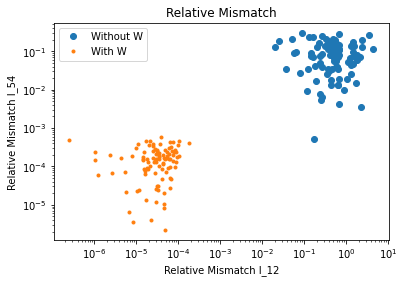

# Extra Project Goals
Think about an interesting variation to this problem or a different way to solve and implement it !!!

Some ideas:
- Assume you have to chose just two out of four possible pseudo-measurements, S<sup>m</sup><sub>1</sub> , S<sup>m</sup><sub>2</sub> , S<sup>m</sup><sub>3</sub> , S<sup>m</sup><sub>4</sub> . What would be your choices and why? Chose based on probable accuracy of the resulting estimation.
- Assume that <i>I<sub>12</sub>=0</i>. Under this assumption, one of two possible situations may be occuring: either branch 1-2 is out of service (<i>y<sub>12</sub>=0</i>) or the corresponding current meter is malfunctioning. Decide about the most probable situation based on the accuracy of the corresponding estimation. as in the previous exercice, use the matrix <i>R<sub>x</sub></i> andd consider different matrices <i>W<sub>z</sub></i> including the identity matrix. Elaborate on the effects of <i>W<sub>z</sub></i>.  
